In [1]:
%matplotlib inline
# %matplotlib qt
# import mpld3
# mpld3.enable_notebook() # seems to just freeze the stuff a bit
# import matplotlib
# matplotlib.use('nbagg') # also slow AF

In [2]:
from __future__ import print_function, division
import os, sys
import numpy as np, scipy as sp, pandas as pd
import scipy.io
import scipy.signal as signal
import scipy.fftpack as ftpk
import matplotlib.pyplot as plt
import matplotlib
from sklearn import svm
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize

In [3]:
e = np.exp(1)
pi = np.pi
pii = np.pi*1j
twopi = np.pi * 2

In [4]:
import pywt
import pyhht
import pyhht.emd

In [5]:
from imp import reload
import auxfilter
import glob

In [6]:
# os.chdir('..')
os.chdir('/home/mike/venvs/ml/ml/py')
print(os.getcwd())
from eegkaggle.vectorizers import naive, spectral
from eegkaggle.dio import dataio
from eegkaggle.plotting import plotstuff
from eegkaggle.msignal import wavelets, metrics

/home/mike/venvs/ml/ml/py


In [7]:
reload(plotstuff)
reload(dataio)
reload(spectral)

<module 'eegkaggle.vectorizers.spectral' from 'eegkaggle/vectorizers/spectral.pyc'>

In [8]:
matplotlib.style.use('ggplot')
colors = ['k', 'r', 'g', 'b', 'm', 'y', 'c']


In [9]:
ssmall,smed, slarge, slong = (4,3), (8,6), (16,12), (16,4)
matplotlib.rcParams['figure.figsize'] = ssmall

Functions

In [10]:
basepath = '/home/mike/Downloads/train_1/'
sources1 = glob.glob(basepath + '*_1.mat') 
sources0 = glob.glob(basepath + '*_0.mat') 

basepathT = '/media/mike/Elements/data/kaggle/melbourne/test_3/'
basepathT = '/home/mike/Downloads/test_1_new/'

sourcesT = glob.glob(basepath + '*.mat') 


In [11]:
# data = pd.read_csv('/home/mike/Downloads/test_new/submit_1478483249.67.csv')
data = pd.read_csv('/media/mike/Elements/data/kaggle/melbourne/train_all/submit_1478496675.38.csv')

# data[['hurst', 'chanstd']] = normalize(data[['hurst', 'chanstd']] ,axis=0)
labels = [name[-5] for name in data['File']]
setnum = [name[0] for name in data['File']]
data['label'] = pd.to_numeric(pd.Series(labels))
data['set'] = pd.to_numeric(pd.Series(setnum))
data.head()

,Unnamed: 0,hurst,chanstd,ccmean,ccstd,File,Class,label,set
0,0,0.642937,28.582705,0.064319,0.323870,1_1000_0.mat,0,0,1
1,1,0.606083,28.408329,0.073427,0.323376,1_1001_0.mat,0,0,1
2,2,0.653069,24.988890,0.045110,0.326239,1_1002_0.mat,0,0,1
3,3,0.636142,34.573742,0.213256,0.351062,1_1003_0.mat,0,0,1
4,4,0.611702,30.189907,0.177274,0.342525,1_1004_0.mat,0,0,1


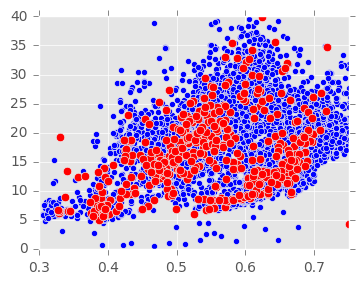

In [12]:
d0 = data[data['label'] == 0]
d1 = data[data['label'] == 1]
plt.scatter(d0['hurst'], d0['chanstd'])
plt.scatter(d1['hurst'], d1['chanstd'], c='r', marker='.', s=150)
x = np.linspace(0.3,.7, 10)
plt.xlim([.3,.75])
plt.ylim([0, 40])
y = -40*x + 40
# plt.plot(x, y)

In [13]:
print(np.corrcoef(data[['hurst', 'chanstd', 'ccmean', 'ccstd']],rowvar=0))

[[ 1.          0.38462533 -0.1782399   0.67211227]
 [ 0.38462533  1.          0.36448607  0.49350022]
 [-0.1782399   0.36448607  1.          0.18243074]
 [ 0.67211227  0.49350022  0.18243074  1.        ]]


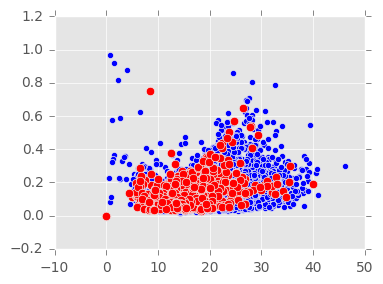

In [14]:
x = 'chanstd'
y = 'ccmean'
plt.scatter(d0[x], d0[y])
plt.scatter(d1[x], d1[y], c='r', marker='.', s=150)

In [15]:
clf = svm.SVC()
x = data[['hurst', 'chanstd', 'ccmean', 'ccstd']].as_matrix()
y = data['label'].as_matrix()

### Train SVM

In [16]:
clf.fit(x, y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [17]:
vec = x[1]
clf.predict(vec.reshape(1,-1))

array([0])

In [18]:
guess =[]
for i in range(len(data)):
    vec = x[i].reshape(1,-1)
    ans = clf.predict(vec)
    guess.append(ans)
    

In [19]:
data['guess'] = pd.Series(guess)

In [20]:
score = data['label'] == data['guess']
score.mean()

0.92567455719251779

# Woah! Probably overfitting. but nice score.

In [21]:
# data = pd.read_csv('/home/mike/Downloads/test_new/submit_1478483249.67.csv')
datatest = pd.read_csv('/home/mike/Downloads/test_new/submit_1478497925.88.csv')
setnum = [name[4] for name in datatest['File']]
datatest['set'] = pd.Series(setnum)
datatest['set'] = pd.to_numeric(datatest['set'])
datatest.head()

,Unnamed: 0,hurst,chanstd,ccmean,ccstd,File,Class,set
0,0,0.543553,15.974331,0.141321,0.290573,new_2_907.mat,1,2
1,1,0.599508,10.851130,0.083844,0.300162,new_3_521.mat,1,3
2,2,0.555639,20.826307,0.277197,0.307219,new_2_435.mat,0,2
3,3,0.721421,20.126127,0.084893,0.333722,new_3_245.mat,0,3
4,4,0.585319,17.870054,0.172700,0.347513,new_1_23.mat,0,1


In [22]:
datatest['File'][0][4]

'2'

In [23]:
x = data[['hurst', 'chanstd', 'ccmean', 'ccstd']].as_matrix()


In [24]:
guess =[]
for i in range(len(data)):
    vec = x[i].reshape(1,-1)
    ans = clf.predict(vec)
    guess.append(ans[0])

In [25]:
datatest['guess'] = pd.Series(guess)
datatest.head()

,Unnamed: 0,hurst,chanstd,ccmean,ccstd,File,Class,set,guess
0,0,0.543553,15.974331,0.141321,0.290573,new_2_907.mat,1,2,0
1,1,0.599508,10.851130,0.083844,0.300162,new_3_521.mat,1,3,0
2,2,0.555639,20.826307,0.277197,0.307219,new_2_435.mat,0,2,0
3,3,0.721421,20.126127,0.084893,0.333722,new_3_245.mat,0,3,0
4,4,0.585319,17.870054,0.172700,0.347513,new_1_23.mat,0,1,0


In [26]:
datatest.to_csv('/home/mike/kaggle/melbourne/svm001.csv')

In [27]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(data[['hurst', 'chanstd']])

In [28]:
data['km'] = pd.Series(kmeans.labels_)

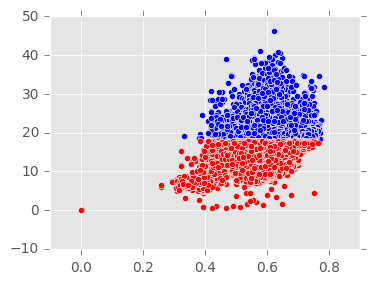

In [29]:
d0 = data[data['km'] == 0]
d1 = data[data['km'] == 1]
d2 = data[data['km'] == 2]

plt.scatter(d0['hurst'], d0['chanstd'])
plt.scatter(d1['hurst'], d1['chanstd'], c='r')
plt.scatter(d2['hurst'], d2['chanstd'], c='c')

In [30]:
score = data['km'] == data['label']
score.mean()

0.55653037576560171

In [31]:
# data = pd.read_csv('/home/mike/Downloads/test_new/submit_1478483249.67.csv')
# data[['hurst', 'chanstd']] = normalize(data[['hurst', 'chanstd']] ,axis=0)
datatest = pd.read_csv('/home/mike/Downloads/test_new/submit_1478497925.88.csv')
setnum = [name[4] for name in datatest['File']]
datatest['set'] = pd.Series(setnum)
datatest['set'] = pd.to_numeric(datatest['set'])
datatest.head()

,Unnamed: 0,hurst,chanstd,ccmean,ccstd,File,Class,set
0,0,0.543553,15.974331,0.141321,0.290573,new_2_907.mat,1,2
1,1,0.599508,10.851130,0.083844,0.300162,new_3_521.mat,1,3
2,2,0.555639,20.826307,0.277197,0.307219,new_2_435.mat,0,2
3,3,0.721421,20.126127,0.084893,0.333722,new_3_245.mat,0,3
4,4,0.585319,17.870054,0.172700,0.347513,new_1_23.mat,0,1


(0, 40)

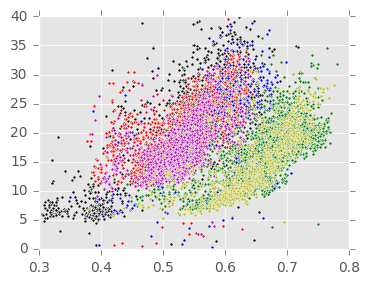

In [34]:
dx = []
marksize = 5
for n in range(0,4):
    dx.append(data[data['set'] == n])
    plt.scatter(dx[n]['hurst'], dx[n]['chanstd'], c=colors[n-1], s=marksize)

dxt = []
for n in range(0,4):
    dxt.append(datatest[datatest['set'] == n])
    plt.scatter(dxt[n]['hurst'], dxt[n]['chanstd'], c=colors[n+2], s=marksize)
    
plt.xlim(.3,.8)
plt.ylim(0,40)
 

In [52]:
x = data[['hurst', 'chanstd']].as_matrix()
y = data['set'] == 3
y = y.as_matrix()

Alphas:  [  1.00000000e-05   1.00000000e-03   1.00000000e-01   1.00000000e+01
   1.00000000e+03]
Datasets shape:  (6041, 11)
2 100 100
1
2
3


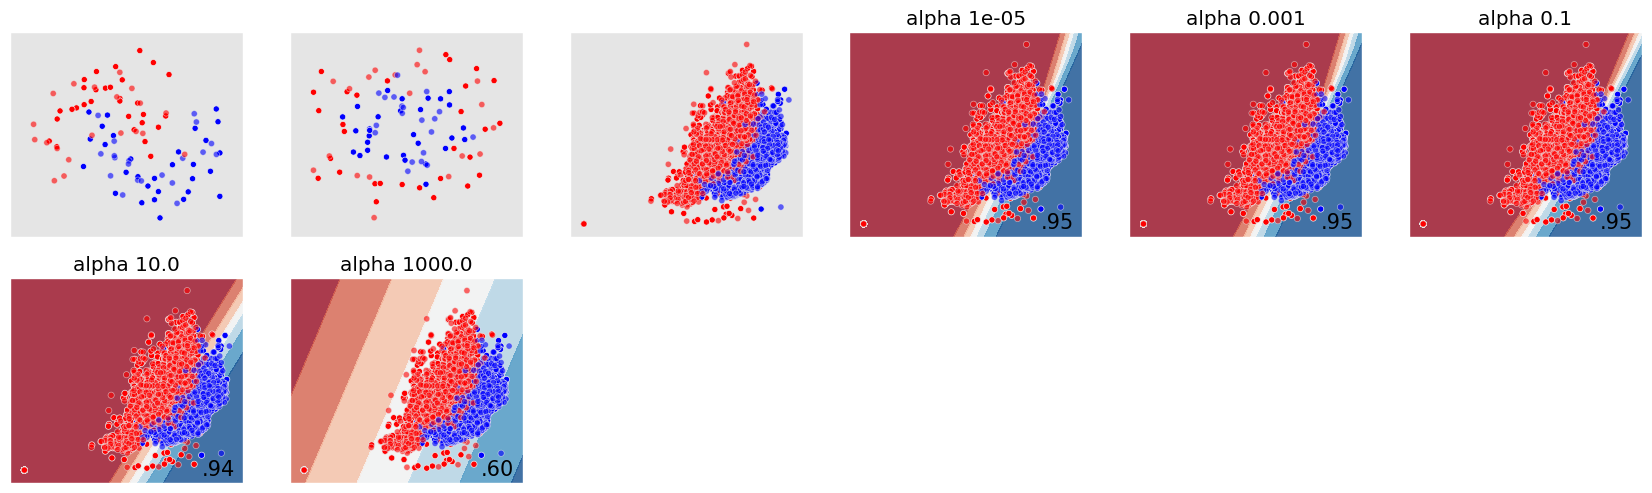

In [57]:
# Use an MLP to try to classify the test set

# Author: Issam H. Laradji
# License: BSD 3 clause

import numpy as np
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier

h = .02  # step size in the mesh

alphas = np.logspace(-5, 3, 5)
print('Alphas: ', alphas)
names = []
for i in alphas:
    names.append('alpha ' + str(i))

classifiers = []
for i in alphas:
    classifiers.append(MLPClassifier(alpha=i, random_state=1))

# X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
#                            random_state=0, n_clusters_per_class=1)
X, y = x, y
rng = np.random.RandomState(2)
# X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [make_moons(noise=0.3, random_state=0),
            make_circles(noise=0.2, factor=0.5, random_state=1),
            linearly_separable]

print('Datasets shape: ', data.shape)
print(len(datasets[0]), len(datasets[0][0]), len(datasets[0][1]))
# assert 0

figure = plt.figure(figsize=(17, 9))
i = 1
# iterate over datasets
for X, y in datasets:
    print(i)
    # preprocess dataset, split into training and test part
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)
    # and testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6)
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1
#- 
    # iterate over classifiers
for name, clf in zip(names, classifiers):
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    if hasattr(clf, "decision_function"):
        Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    else:
        Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

    # Plot also the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)
    # and testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
               alpha=0.6)

    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(name)
    ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
            size=15, horizontalalignment='right')
    i += 1

#--
        
figure.subplots_adjust(left=.02, right=.98)
plt.show()


In [58]:
classy = MLPClassifier(alpha=i, random_state=1)
X, y = x, y
linearly_separable = (X, y)

In [61]:
print(linearly_separable[0].shape)

(6041, 2)
